In [412]:
# Import modules
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import modules for machine learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import confusion_matrix



In [413]:
df = pd.read_csv('data/Titanic_Cleaned.csv')

In [414]:
df.head()

,PassengerId,Survived,Pclass,SibSp,Parch,HasCabin,CatAge,CatFare,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Unique
0,1,0.0,3,1,0,False,0,0,True,False,True,False,True,False,False
1,2,1.0,1,1,0,True,3,3,False,False,False,False,False,True,False
2,3,1.0,3,0,0,False,1,1,False,False,True,True,False,False,False
3,4,1.0,1,1,0,True,2,3,False,False,True,False,False,True,False
4,5,0.0,3,0,0,False,2,1,True,False,True,False,True,False,False


In [415]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   1309 non-null   int64  
 1   Survived      891 non-null    float64
 2   Pclass        1309 non-null   int64  
 3   SibSp         1309 non-null   int64  
 4   Parch         1309 non-null   int64  
 5   HasCabin      1309 non-null   bool   
 6   CatAge        1309 non-null   int64  
 7   CatFare       1309 non-null   int64  
 8   Sex_male      1309 non-null   bool   
 9   Embarked_Q    1309 non-null   bool   
 10  Embarked_S    1309 non-null   bool   
 11  Title_Miss    1309 non-null   bool   
 12  Title_Mr      1309 non-null   bool   
 13  Title_Mrs     1309 non-null   bool   
 14  Title_Unique  1309 non-null   bool   
dtypes: bool(8), float64(1), int64(6)
memory usage: 81.9 KB


,PassengerId,Survived,Pclass,SibSp,Parch,CatAge,CatFare
count,1309.000000,891.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,655.000000,0.383838,2.294882,0.498854,0.385027,1.381207,1.486631
std,378.020061,0.486592,0.837836,1.041658,0.865560,1.112474,1.122135
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
50%,655.000000,0.000000,3.000000,0.000000,0.000000,1.000000,1.000000
75%,982.000000,1.000000,3.000000,1.000000,0.000000,2.000000,2.000000
max,1309.000000,1.000000,3.000000,8.000000,9.000000,3.000000,3.000000


In [416]:
# Split the dataset
df_train = df[df['Survived'].notnull()]
df_test = df[df['Survived'].isnull()]

# Check the shapes
print(f"Training set shape: {df_train.shape}")
print(f"Test set shape: {df_test.shape}")


Training set shape: (891, 15)
Test set shape: (418, 15)


In [417]:
#Save the test set to a new csv file
df_test.to_csv('data/test.csv', index=False)
df_train.to_csv('data/train.csv', index=False)


In [418]:
df_train = pd.read_csv('data/train.csv')
df_test = pd.read_csv('data/test.csv')

In [419]:
df_train.head()

,PassengerId,Survived,Pclass,SibSp,Parch,HasCabin,CatAge,CatFare,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Unique
0,1,0.0,3,1,0,False,0,0,True,False,True,False,True,False,False
1,2,1.0,1,1,0,True,3,3,False,False,False,False,False,True,False
2,3,1.0,3,0,0,False,1,1,False,False,True,True,False,False,False
3,4,1.0,1,1,0,True,2,3,False,False,True,False,False,True,False
4,5,0.0,3,0,0,False,2,1,True,False,True,False,True,False,False


In [420]:
df_test.head()

,PassengerId,Survived,Pclass,SibSp,Parch,HasCabin,CatAge,CatFare,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Unique
0,892,NaN,3,0,0,False,2,0,True,True,False,False,True,False,False
1,893,NaN,3,1,0,False,3,0,False,False,True,False,False,True,False
2,894,NaN,2,0,0,False,3,1,True,True,False,False,True,False,False
3,895,NaN,3,0,0,False,1,1,True,False,True,False,True,False,False
4,896,NaN,3,1,1,False,0,1,False,False,True,False,False,True,False


In [421]:
# Create 'TravelAlone' feature
df_train['TravelAlone'] = np.where((df_train['SibSp'] + df_train['Parch']) > 0, 0, 1)

# View the new feature
df_train[['SibSp', 'Parch', 'TravelAlone']].head()

,SibSp,Parch,TravelAlone
0,1,0,0
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1


In [422]:
# Drop the 'SibSp' & 'Parch' columns as they are no longer needed
df_train.drop('SibSp', axis=1, inplace=True) # Drop SibSp
df_train.drop('Parch', axis=1, inplace=True) # Drop Parch 

In [423]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'HasCabin', 'CatAge', 'CatFare',
       'Sex_male', 'Embarked_Q', 'Embarked_S', 'Title_Miss', 'Title_Mr',
       'Title_Mrs', 'Title_Unique', 'TravelAlone'],
      dtype='object')

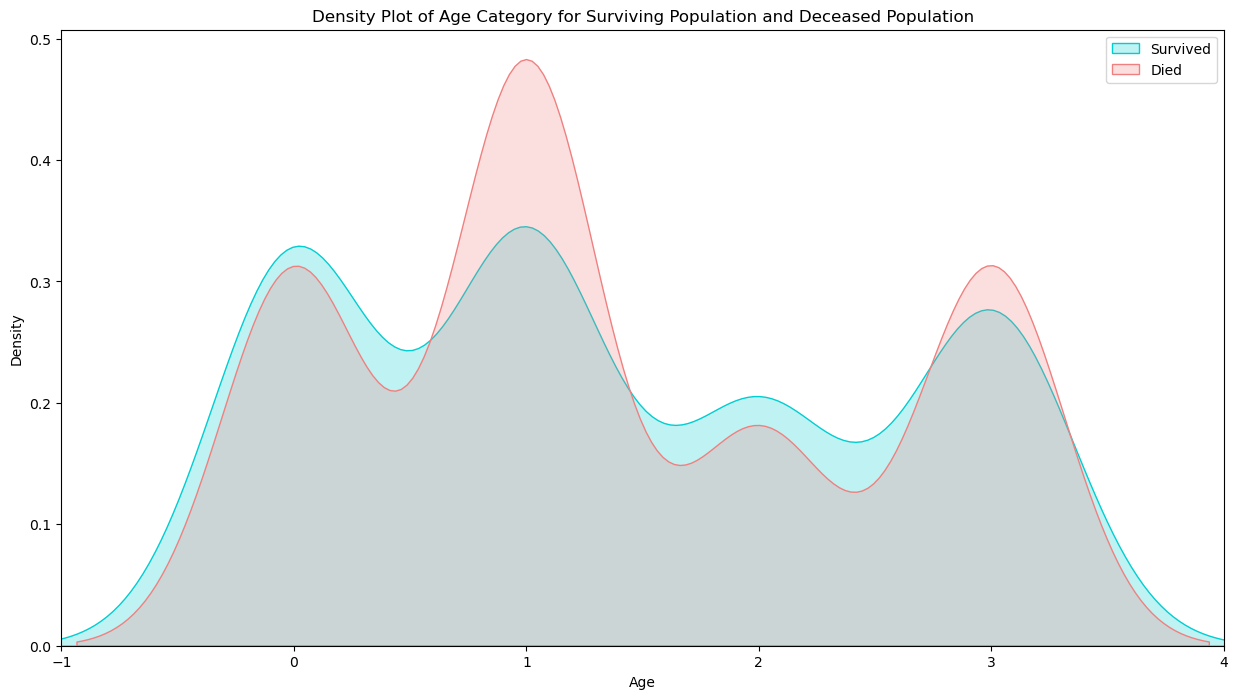

In [424]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(df_train["CatAge"][df_train.Survived == 1], color="darkturquoise", fill=True)
sns.kdeplot(df_train["CatAge"][df_train.Survived == 0], color="lightcoral", fill=True)
plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Age Category for Surviving Population and Deceased Population')
ax.set(xlabel='Age')
plt.xlim(-1,4)
plt.show()

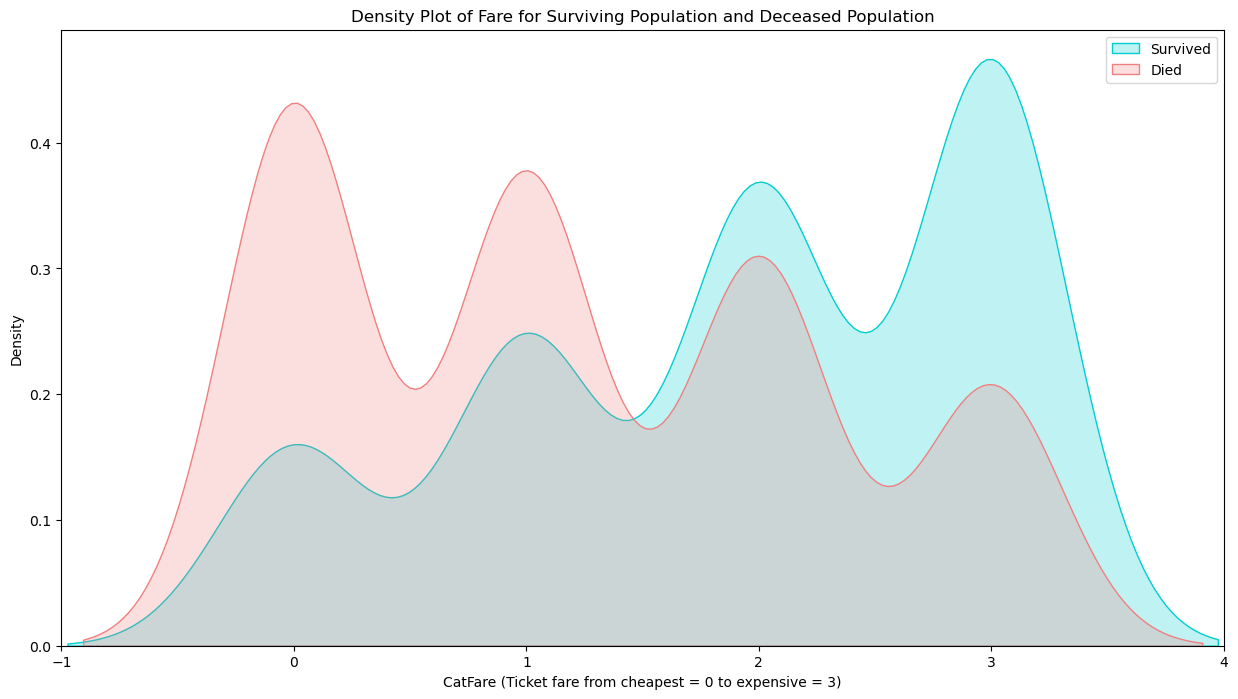

In [425]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(df_train["CatFare"][df_train.Survived == 1], color="darkturquoise", fill=True)
sns.kdeplot(df_train["CatFare"][df_train.Survived == 0], color="lightcoral", fill=True)
plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Fare for Surviving Population and Deceased Population')
ax.set(xlabel='CatFare (Ticket fare from cheapest = 0 to expensive = 3)')
plt.xlim(-1,4)
plt.show()

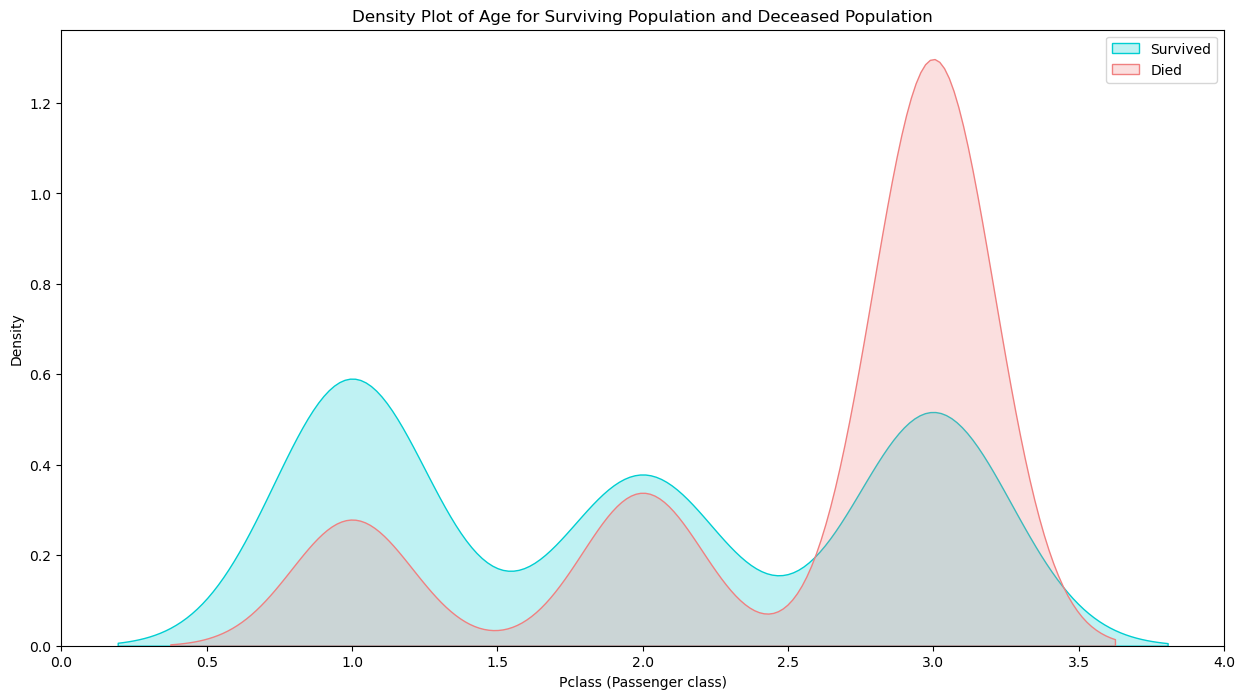

In [426]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(df_train["Pclass"][df_train.Survived == 1], color="darkturquoise", fill=True)
sns.kdeplot(df_train["Pclass"][df_train.Survived == 0], color="lightcoral", fill=True)
plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Age for Surviving Population and Deceased Population')
ax.set(xlabel='Pclass (Passenger class)')
plt.xlim(0,4)
plt.show()

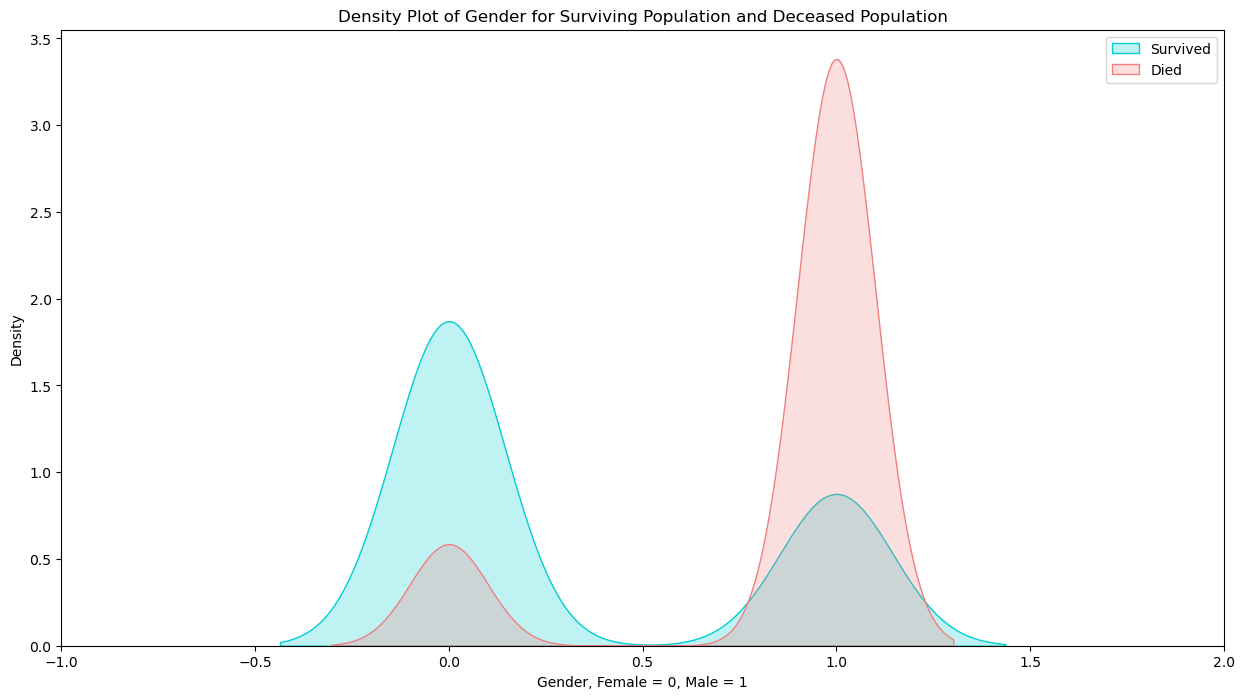

In [427]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(df_train["Sex_male"][df_train.Survived == 1], color="darkturquoise", fill=True)
sns.kdeplot(df_train["Sex_male"][df_train.Survived == 0], color="lightcoral", fill=True)
plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Gender for Surviving Population and Deceased Population')
ax.set(xlabel='Gender, Female = 0, Male = 1')
plt.xlim(-1,2)
plt.show()

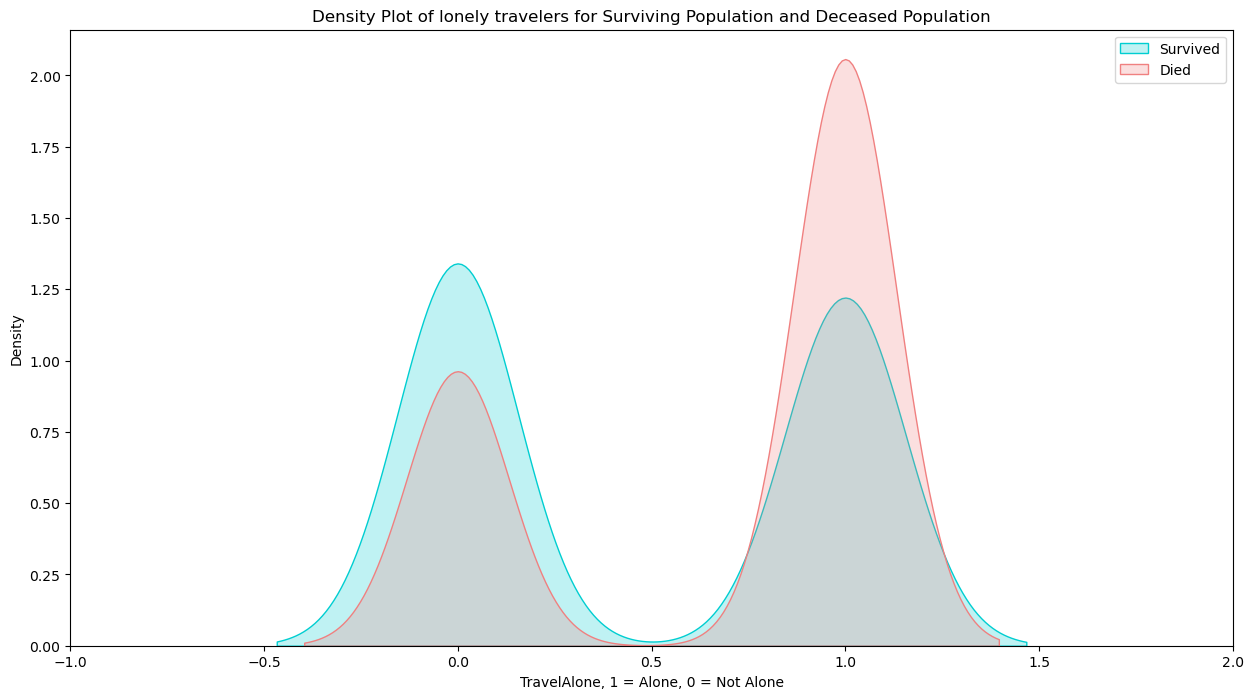

In [428]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(df_train["TravelAlone"][df_train.Survived == 1], color="darkturquoise", fill=True)
sns.kdeplot(df_train["TravelAlone"][df_train.Survived == 0], color="lightcoral", fill=True)
plt.legend(['Survived', 'Died'])
plt.title('Density Plot of lonely travelers for Surviving Population and Deceased Population')
ax.set(xlabel='TravelAlone, 1 = Alone, 0 = Not Alone')
plt.xlim(-1,2)
plt.show()

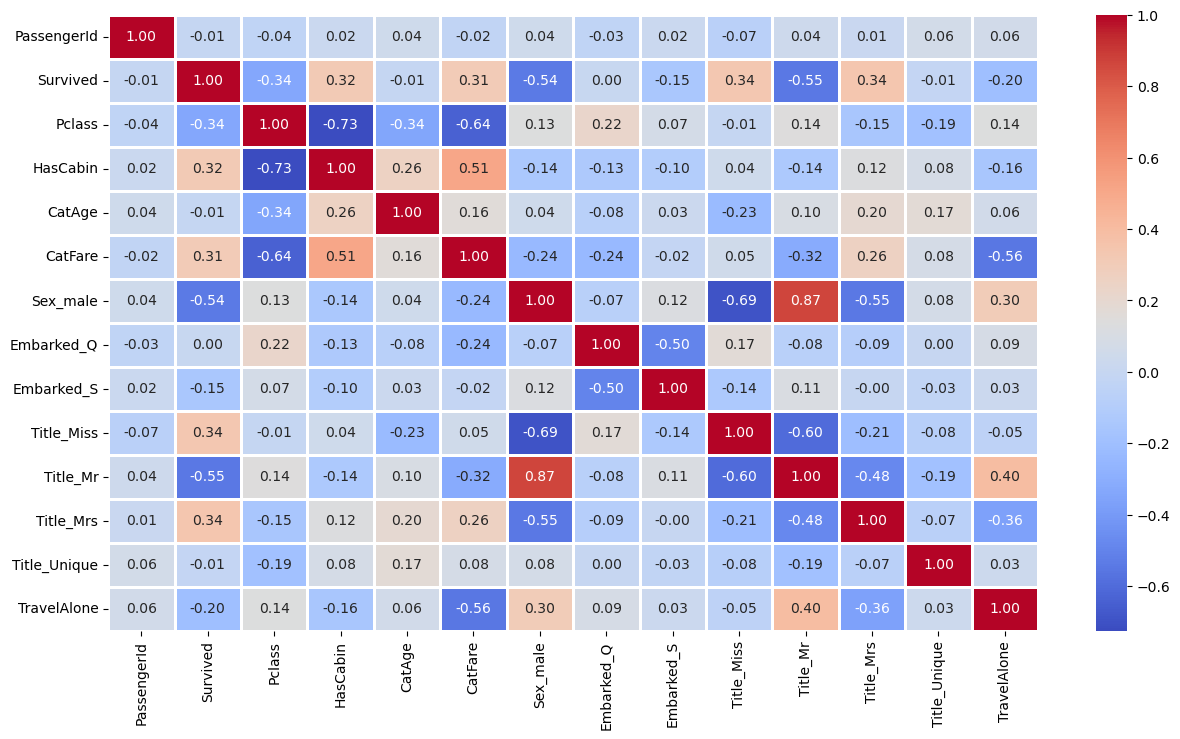

In [429]:
# Correlation matrix
plt.figure(figsize=(15,8))
sns.heatmap(df_train.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=2)
plt.show()

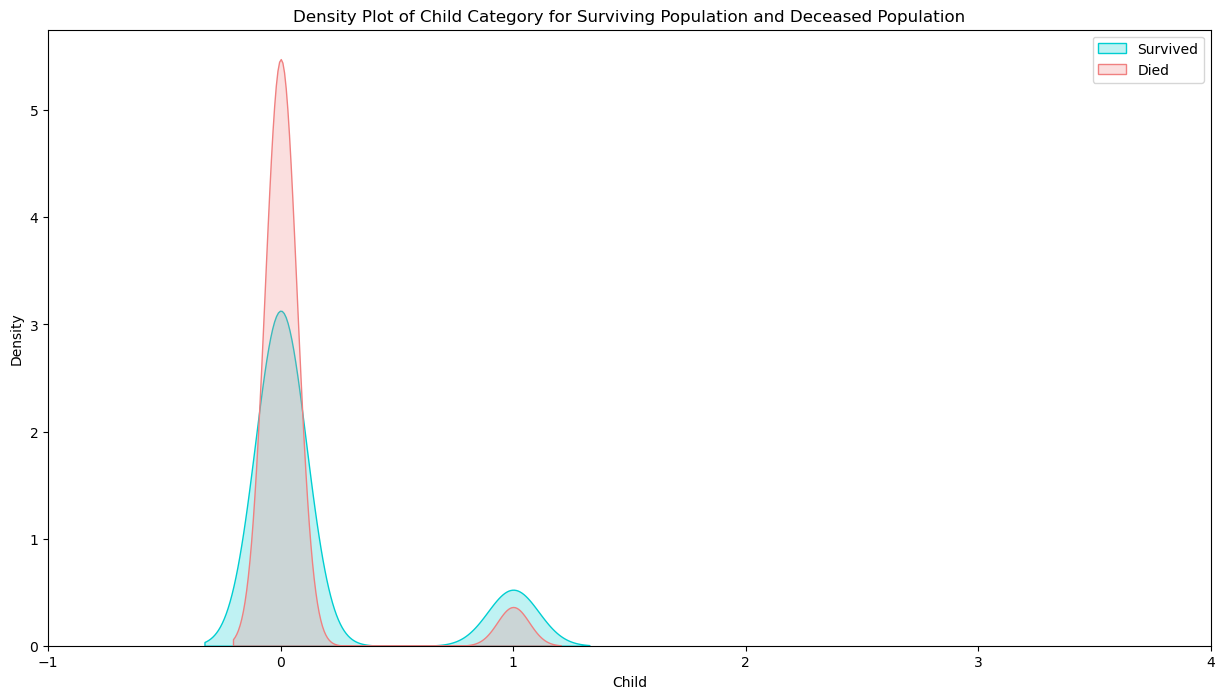

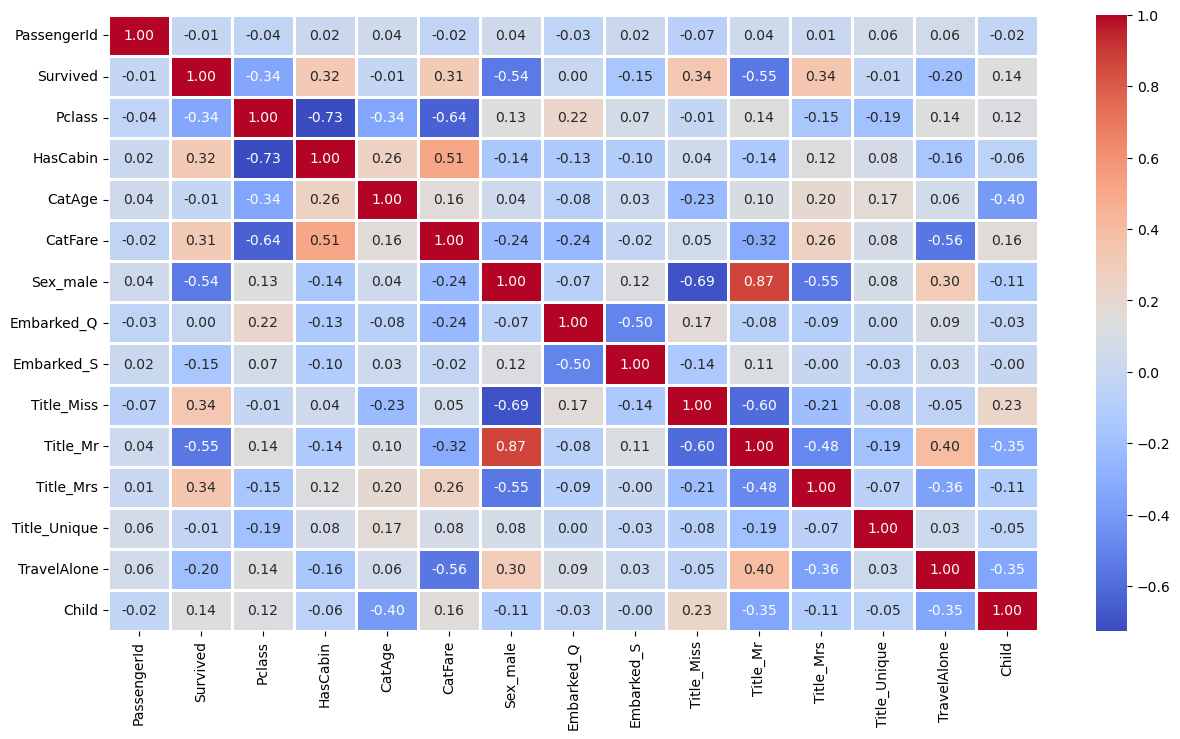

In [430]:
# Getting the age from the previous lab's data
old_df = pd.read_csv('data/Titanic.csv')

# Extract the age column from old_df
age = old_df['Age']

#Fill missing values - we'll use the median since the data is right skewed.
age.fillna(age.median(), inplace=True)

# Insert Age back into train_df
df_train['Age'] = age

# Create age column where age is less than 16
df_train.loc[:, 'Child'] = np.where(df_train['Age'] < 16, 1, 0)

# Drop the 'Age' column as it is no longer needed
df_train.drop('Age', axis=1, inplace=True)

# View survival rate of new feature, child
plt.figure(figsize=(15,8))
ax = sns.kdeplot(df_train["Child"][df_train.Survived == 1], color="darkturquoise", fill=True)
sns.kdeplot(df_train["Child"][df_train.Survived == 0], color="lightcoral", fill=True)
plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Child Category for Surviving Population and Deceased Population')
ax.set(xlabel='Child')
plt.xlim(-1,4)
plt.show()

# Correlation matrix
plt.figure(figsize=(15,8))
sns.heatmap(df_train.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=2)
plt.show()

In [431]:
"""
Strongest Correlations with 'Survived':
Sex_male (-0.54): Males were less likely to survive.
Title_Mr (-0.55): "Mr." title correlates with lower survival.
Title_Miss and Title_Mrs (0.34): Women with these titles had a higher survival rate.
Pclass (-0.34): Lower classes had lower survival rates.
HasCabin (0.32): Having a cabin increased survival chances.
CatFare (0.31): Higher fares correlate with better survival.
Highly Correlated Features:
Sex_male and Title_Mr (0.87): Males are often titled "Mr."
Pclass and HasCabin (-0.73): Lower class passengers were less likely to have cabins.
Pclass and CatFare (-0.64): Lower classes paid lower fares.
"""

'\nStrongest Correlations with \'Survived\':\nSex_male (-0.54): Males were less likely to survive.\nTitle_Mr (-0.55): "Mr." title correlates with lower survival.\nTitle_Miss and Title_Mrs (0.34): Women with these titles had a higher survival rate.\nPclass (-0.34): Lower classes had lower survival rates.\nHasCabin (0.32): Having a cabin increased survival chances.\nCatFare (0.31): Higher fares correlate with better survival.\nHighly Correlated Features:\nSex_male and Title_Mr (0.87): Males are often titled "Mr."\nPclass and HasCabin (-0.73): Lower class passengers were less likely to have cabins.\nPclass and CatFare (-0.64): Lower classes paid lower fares.\n'

In [432]:
# 1. Prepare the data
X = df_train.drop(['PassengerId', 'Survived'], axis=1)
y = df_train['Survived']

# If there are categorical variables, make sure to encode them appropriately
# For example:
# X = pd.get_dummies(X, drop_first=True)

# 2. Initialize the model
model = LogisticRegression(max_iter=1000)

# 3. Perform RFE
rfe = RFE(estimator=model, n_features_to_select=8)
rfe.fit(X, y)

# 4. List the selected features
selected_features = X.columns[rfe.support_]
print('Selected features:', selected_features)

Selected features: Index(['Pclass', 'HasCabin', 'Sex_male', 'Embarked_S', 'Title_Mr', 'Title_Mrs',
       'Title_Unique', 'Child'],
      dtype='object')


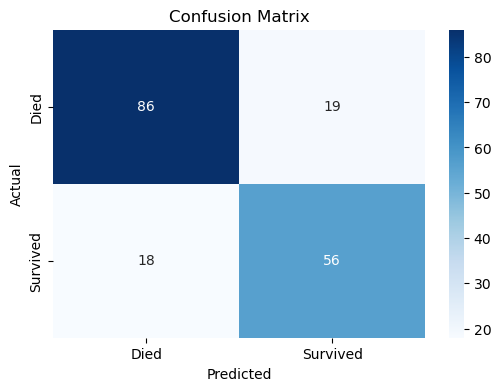

              precision    recall  f1-score   support

         0.0       0.83      0.82      0.82       105
         1.0       0.75      0.76      0.75        74

    accuracy                           0.79       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.79      0.79      0.79       179



In [433]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

# 1. Split the data
X = df_train[selected_features]
y = df_train['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Train the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# 3. Make predictions
y_pred = model.predict(X_test)

# 4. Evaluate the model
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Died', 'Survived'], yticklabels=['Died', 'Survived'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print(classification_report(y_test, y_pred))

In [434]:
"""
True Positives (TP): This quadrant represents the cases where the model correctly predicted the positive class (survived). These are the passengers who were correctly classified as survivors.

True Negatives (TN): This quadrant represents the cases where the model correctly predicted the negative class (not survived). These are the passengers who were correctly classified as non-survivors.

False Positives (FP): This quadrant represents the cases where the model incorrectly predicted the positive class (survived). These are the passengers who were incorrectly classified as survivors when they did not actually survive.

False Negatives (FN): This quadrant represents the cases where the model incorrectly predicted the negative class (not survived). These are the passengers who were incorrectly classified as non-survivors when they actually survived.
"""

'\nTrue Positives (TP): This quadrant represents the cases where the model correctly predicted the positive class (survived). These are the passengers who were correctly classified as survivors.\n\nTrue Negatives (TN): This quadrant represents the cases where the model correctly predicted the negative class (not survived). These are the passengers who were correctly classified as non-survivors.\n\nFalse Positives (FP): This quadrant represents the cases where the model incorrectly predicted the positive class (survived). These are the passengers who were incorrectly classified as survivors when they did not actually survive.\n\nFalse Negatives (FN): This quadrant represents the cases where the model incorrectly predicted the negative class (not survived). These are the passengers who were incorrectly classified as non-survivors when they actually survived.\n'

Accuracy: 0.79
Log Loss: 0.44
AUC: 0.87


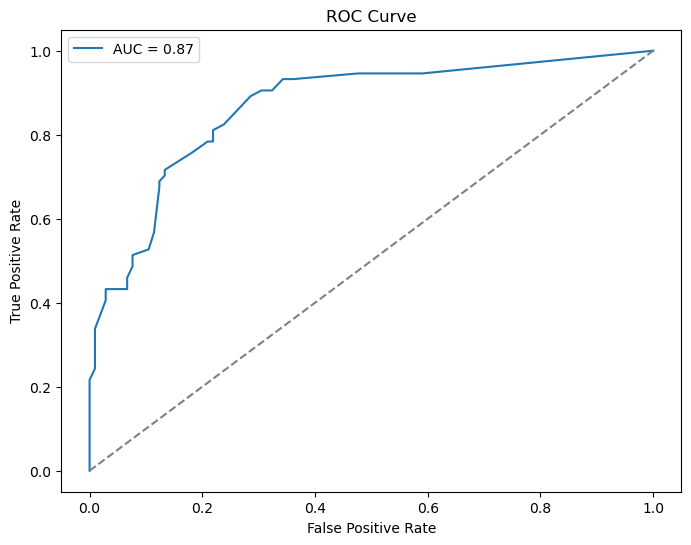

In [435]:
from sklearn.metrics import accuracy_score, log_loss, roc_auc_score, roc_curve

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Log Loss
y_pred_proba = model.predict_proba(X_test)[:,1]
logloss = log_loss(y_test, y_pred_proba)
print(f'Log Loss: {logloss:.2f}')

# AUC
auc = roc_auc_score(y_test, y_pred_proba)
print(f'AUC: {auc:.2f}')

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0,1], [0,1], linestyle='--', color='grey')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [436]:
from sklearn.model_selection import cross_val_score

# Initialize the model
model = LogisticRegression(max_iter=1000)

# Accuracy
scores_accuracy = cross_val_score(model, X, y, cv=10, scoring='accuracy')
print(f'Average Accuracy: {scores_accuracy.mean():.2f}')

# Log Loss
scores_log_loss = cross_val_score(model, X, y, cv=10, scoring='neg_log_loss')
print(f'Average Log Loss: {-scores_log_loss.mean():.2f}')

# AUC
scores_auc = cross_val_score(model, X, y, cv=10, scoring='roc_auc')
print(f'Average AUC: {scores_auc.mean():.2f}')

Average Accuracy: 0.79
Average Log Loss: 0.44
Average AUC: 0.86
